# Implementation of ANN using Keras

In [1]:
## Importing Libariries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\nk141\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 4s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
X_train_full[0].shape

(28, 28)

In [13]:
print(f"data type of X_train_full: (X_train_full.dtypes),\n shape of X_train_full: (X_train_full.shape)")

data type of X_train_full: (X_train_full.dtypes),
 shape of X_train_full: (X_train_full.shape)


In [14]:
## Create a validiate data set from the full tarining data
## Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scaled the test set as well
X_test = X_test / 255

In [15]:
## Train - 55000
## Test - 10000
## Validiate  - 5000

In [16]:
len(X_train_full[5000:])

55000

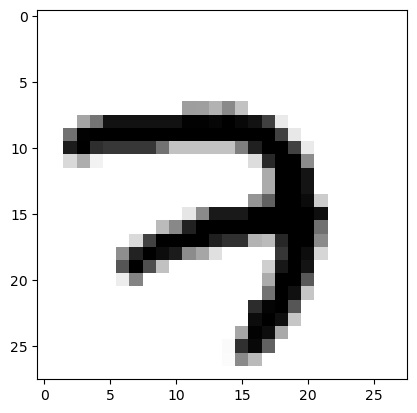

In [18]:
## Let's visualize some data

plt.imshow(X_train[0], cmap="binary")
plt.show()

<AxesSubplot:>

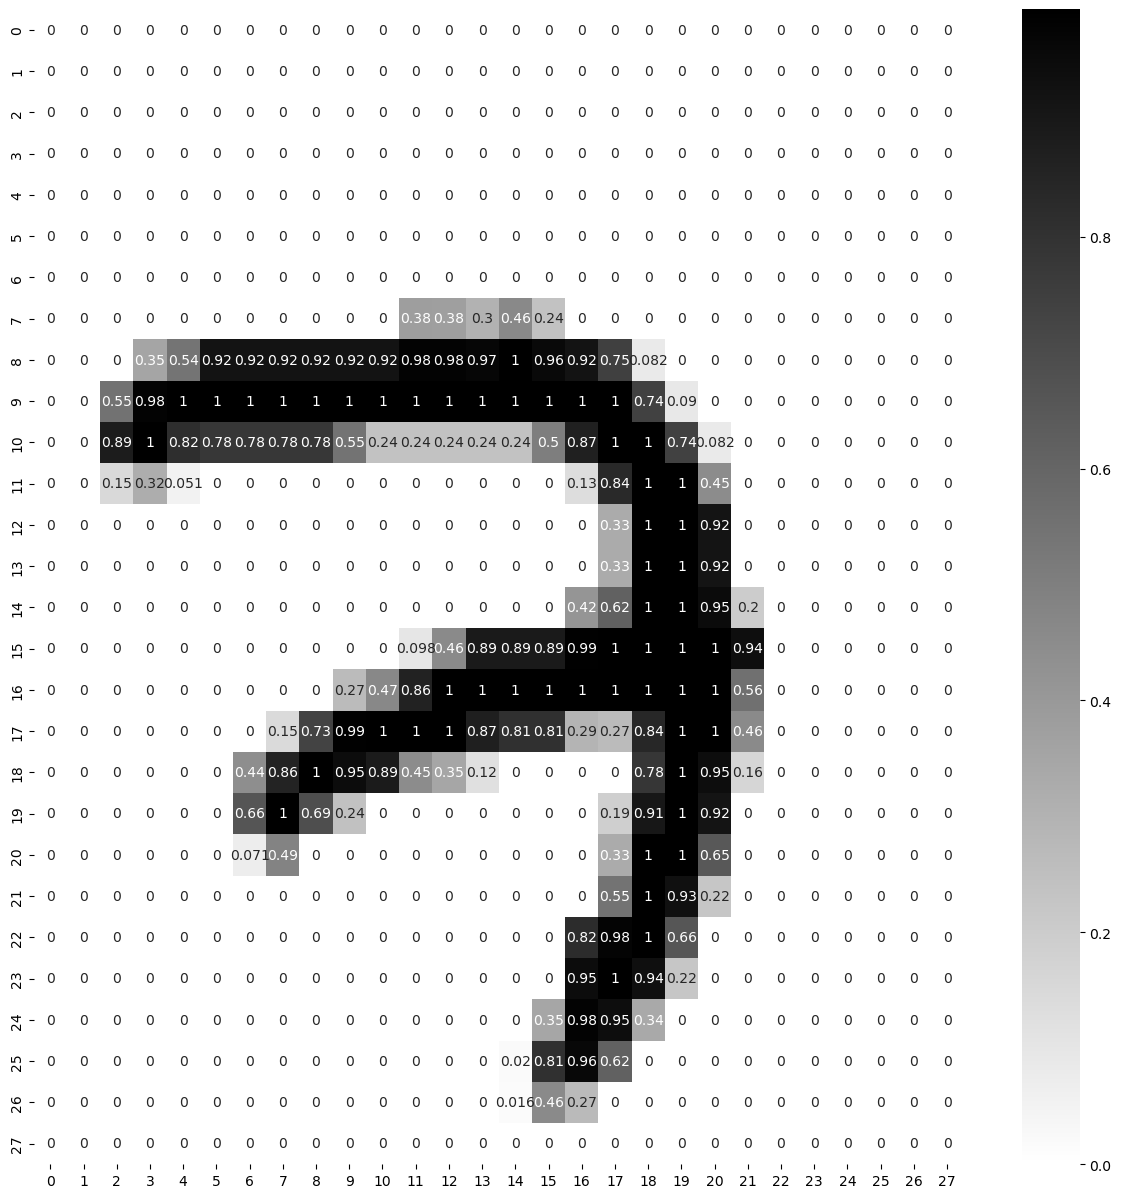

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [21]:
## Imput is
28*28

784

In [22]:
## now cxreating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
         tf.keras.layers.Dense(300, activation='relu', name="hiddenlayer1"),
         tf.keras.layers.Dense(100, activation='relu', name="hiddenlayer2"),
         tf.keras.layers.Dense(10, activation='softmax', name="outputlayer")]


model_clf = tf.keras.models.Sequential(LAYERS)

In [23]:
model_clf.layers

In [24]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
## Let's verify
## firdtlayer * secondlayer + bias
784*300+300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [28]:
## Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [42]:
hidden1 = model_clf.layers[3]

hidden1.name

'outputlayer'

In [31]:
len(hidden1.get_weights())

2

In [32]:
hidden1.get_weights()

[array([[-2.22045109e-01,  8.96773636e-02, -1.50939494e-01,
         -1.00667924e-01, -1.09229460e-01, -1.99828148e-01,
         -4.10352200e-02, -1.22077763e-03, -3.19375247e-02,
          2.37174332e-02],
        [ 6.42533004e-02, -1.24592952e-01, -1.79522425e-01,
         -5.92532903e-02,  2.08006293e-01, -4.34581339e-02,
         -4.03426439e-02, -1.99094355e-01,  1.07319117e-01,
          1.55656308e-01],
        [-6.73542619e-02,  2.53615379e-02, -1.39647409e-01,
          2.15630352e-01, -1.51274994e-01,  1.72777086e-01,
          2.03489274e-01, -2.29275376e-01, -1.30966440e-01,
         -2.21097171e-02],
        [-1.90342948e-01, -1.12135537e-01, -1.11053288e-01,
         -8.89286995e-02,  2.38293707e-02, -1.59123898e-01,
          4.37293053e-02,  8.06035399e-02,  9.76639688e-02,
         -3.88319194e-02],
        [-9.06135440e-02, -6.29490465e-02,  3.44000757e-03,
          1.89224482e-02, -1.21693164e-02,  4.18718457e-02,
          2.37590373e-02, -1.43669426e-01,  1.620623

In [40]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)


In [41]:
## Training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                       validation_data = VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 19s 9ms/step - loss: 0.2134 - accuracy: 0.9362 - val_loss: 0.0954 - val_accuracy: 0.9712
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0894 - accuracy: 0.9723 - val_loss: 0.0776 - val_accuracy: 0.9764
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0593 - accuracy: 0.9808 - val_loss: 0.0737 - val_accuracy: 0.9786
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0437 - accuracy: 0.9857 - val_loss: 0.0608 - val_accuracy: 0.9840
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0826 - val_accuracy: 0.9762
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.0707 - val_accuracy: 0.9818
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0232 - accuracy: 0.9919 - val_loss: 0.0807 - val_ac

In [43]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [45]:
## Now seeing history in the table format
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.213380,0.936218,0.095359,0.9712
1,0.089395,0.972309,0.077584,0.9764
2,0.059268,0.980818,0.073740,0.9786
3,0.043660,0.985727,0.060837,0.9840
4,0.035184,0.988691,0.082583,0.9762
5,0.028805,0.990709,0.070699,0.9818
6,0.023206,0.991855,0.080707,0.9788
7,0.020741,0.993036,0.096654,0.9772
8,0.017582,0.994055,0.078696,0.9812
9,0.015027,0.994782,0.096499,0.9800


<AxesSubplot:>

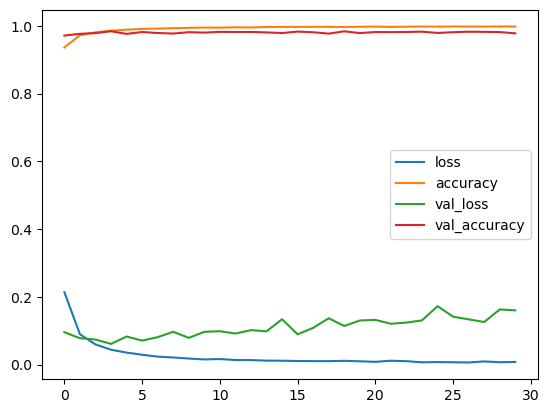

In [47]:
pd.DataFrame(history.history).plot()

In [48]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1940 - accuracy: 0.9770


[0.19404006004333496, 0.9769999980926514]

In [49]:
## Let's check sample test
x_new = X_test[:3]

In [53]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [52]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 132ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
y_prob

array([[1.0174538e-23, 3.7012470e-23, 6.1730562e-23, 1.0650255e-17,
        2.4420616e-20, 1.2951135e-30, 5.3413782e-30, 1.0000000e+00,
        1.5810742e-20, 1.9470975e-15],
       [2.1343566e-19, 1.5664149e-19, 1.0000000e+00, 1.2452404e-25,
        7.8341792e-27, 6.4802653e-33, 1.4114700e-29, 4.3218325e-24,
        2.3397867e-22, 0.0000000e+00],
       [2.2961063e-07, 9.9998534e-01, 3.0650973e-08, 1.9386817e-09,
        2.3660133e-08, 1.0242939e-06, 1.2283545e-08, 1.2207240e-08,
        1.3392432e-05, 3.4195912e-12]], dtype=float32)

In [55]:
y_pred = np.argmax(y_prob, axis = -1)

In [56]:
y_pred

array([7, 2, 1], dtype=int64)

In [57]:
actual

array([7, 2, 1], dtype=uint8)

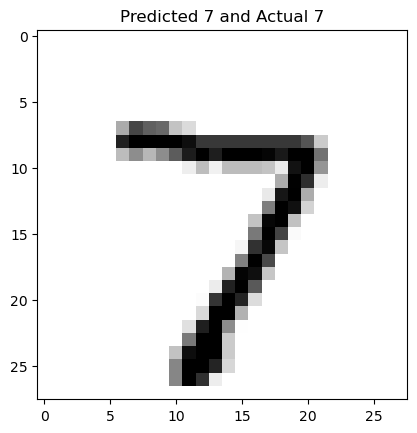

##########################


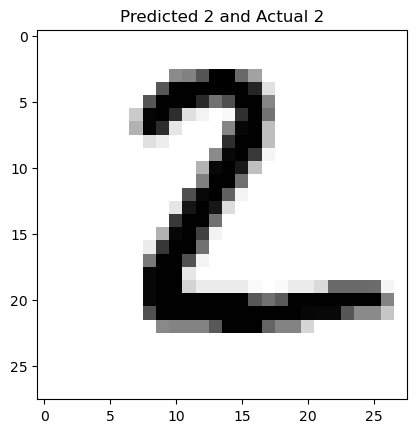

##########################


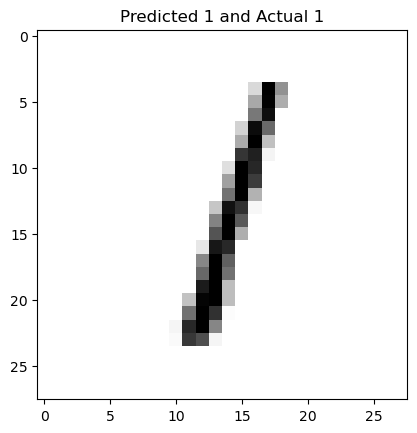

##########################


In [66]:
## Let's visualize from plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted {pred} and Actual {actual_data}")
    plt.axis=("off")
    plt.show()
    print("##########################")